## Importing Libraries

In [1]:
#import folium                                 # visualization
import geopandas as gpd                        # data analysis and manipulation
import glob                                   # data access
import json                                   # JSON encoder and decoder
import matplotlib.pyplot as plt               # create visualizations
import numpy as np                            # scientific computing
import os                                     # data access
from datetime import date                     # dates, times and intervals
from folium import plugins                    # visualization
from scripts.credential import username_landsat, password_landsat, username_sentinel, password_sentinel
from scripts.download_imagery import DownloadImagery
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt  # interface to Open Access Hub
from shapely.geometry import Polygon, Point
from zipfile import ZipFile                   # file management
import pandas as pd
import time                                   # time assessment
from zipfile import ZipFile                   # file management


c:\Users\cande\anaconda3\envs\flooding\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Reading Area of Interest

In [2]:
geom = gpd.read_file('../raw_data/ebro_area.gpkg')
geom.head()

,id,geometry
0,1,"MULTIPOLYGON (((-1.24849 41.85188, -1.11129 41..."


## Downloading Sentinel Imagery

In [3]:
sentinel_gdf = DownloadImagery.search_sentinel(username = username_sentinel,
                                                password = password_sentinel,
                                                boundary= geom,
                                                start_date= '20180301',
                                                end_date= '20180430',
                                                max_cloud_cover= 20)

In [4]:
sentinel_gdf

,title,link,link_alternative,link_icon,summary,ondemand,ingestiondate,beginposition,endposition,orbitnumber,...,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry,contains
2208cb58-7405-4bdf-be2b-0287ea18894d,S2B_MSIL2A_20180330T105619_N0207_R094_T30TXM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-03-30T10:56:19.027Z, Instrument: MS...",false,2018-03-30 16:28:15.393,2018-03-30 10:56:19.027,2018-03-30 10:56:19.027,5554,...,DESCENDING,Sentinel-2B,02.07,Level-2A,S2MSI2A,Sentinel-2,1.24 GB,2208cb58-7405-4bdf-be2b-0287ea18894d,"POLYGON ((-1.78400 42.44624, -0.44979 42.42431...",True
fc8cfbc4-a79d-4438-96e1-a5212d7a59d4,S2B_MSIL2A_20180419T105619_N0207_R094_T30TXM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-04-19T10:56:19.027Z, Instrument: MS...",false,2018-04-19 14:56:58.114,2018-04-19 10:56:19.027,2018-04-19 10:56:19.027,5840,...,DESCENDING,Sentinel-2B,02.07,Level-2A,S2MSI2A,Sentinel-2,1.26 GB,fc8cfbc4-a79d-4438-96e1-a5212d7a59d4,"POLYGON ((-1.78400 42.44624, -0.44979 42.42431...",True
32d3b109-852c-4fe8-9c33-045de537aaba,S2A_MSIL2A_20180421T105031_N0207_R051_T30TXM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-04-21T10:50:31.026Z, Instrument: MS...",false,2018-04-21 17:28:14.799,2018-04-21 10:50:31.026,2018-04-21 10:50:31.026,14777,...,DESCENDING,Sentinel-2A,02.07,Level-2A,S2MSI2A,Sentinel-2,986.84 MB,32d3b109-852c-4fe8-9c33-045de537aaba,"POLYGON ((-1.60160 41.45428, -1.58140 41.51887...",True
d1ff352f-f728-4dea-9076-cd9547e677e5,S2A_MSIL2A_20180424T105651_N0207_R094_T30TXM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-04-24T10:56:51.024Z, Instrument: MS...",false,2018-04-24 20:28:29.344,2018-04-24 10:56:51.024,2018-04-24 10:56:51.024,14820,...,DESCENDING,Sentinel-2A,02.07,Level-2A,S2MSI2A,Sentinel-2,1.28 GB,d1ff352f-f728-4dea-9076-cd9547e677e5,"POLYGON ((-1.78400 42.44624, -0.44979 42.42431...",True
51941a00-aae1-4acc-9886-2a1b7f5379c2,S2B_MSIL2A_20180426T105029_N0207_R051_T30TXM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-04-26T10:50:29.027Z, Instrument: MS...",false,2018-04-26 21:40:38.097,2018-04-26 10:50:29.027,2018-04-26 10:50:29.027,5940,...,DESCENDING,Sentinel-2B,02.07,Level-2A,S2MSI2A,Sentinel-2,982.53 MB,51941a00-aae1-4acc-9886-2a1b7f5379c2,"POLYGON ((-1.59654 41.45420, -1.56686 41.54860...",True


<Axes: >

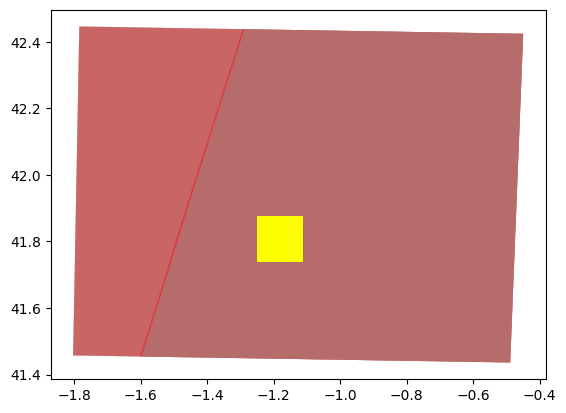

In [7]:
ax = sentinel_gdf.plot('platformidentifier',
                    alpha = 0.5,
                    cmap = 'Set1',
                    #legend = True
                     )
geom.plot(ax=ax)

square_geom = DownloadImagery.create_square_bbox(geom['geometry'])

square_geom.plot(ax=ax, color = 'yellow')

In [9]:
for i in sentinel_gdf['identifier']:
    try:
        DownloadImagery.download_sentinel(username = username_sentinel,
                                password = password_sentinel,
                                gdf = sentinel_gdf,
                                idx = i,
                                bound_crs= geom)
    except:
        print(f'Not possible to download {i}.')
        pass

Not possible to download S2B_MSIL2A_20180330T105619_N0207_R094_T30TXM_20180330T130438.


In [9]:
try:
    DownloadImagery.download_sentinel(username = username_sentinel,
                                password = password_sentinel,
                                gdf = sentinel_gdf,
                                idx = 0,
                                bound_crs= geom)
except:
    print(f'Not possible to download.')
    pass

Unzipping images
Not possible to download.


In [6]:
try:
    DownloadImagery.download_sentinel(username = username_sentinel,
                                password = password_sentinel,
                                gdf = sentinel_gdf,
                                idx = 2,
                                bound_crs= geom)
except:
    print(f'Not possible to download.')
    pass

Not possible to download.


## Downloading Landsat imagery

In [66]:
centroidx, centroidy = geom.centroid.x, geom.centroid.y

C:\Users\cande\AppData\Local\Temp\ipykernel_10404\1844159588.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroidx, centroidy = geom.centroid.x, geom.centroid.y
C:\Users\cande\AppData\Local\Temp\ipykernel_10404\1844159588.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroidx, centroidy = geom.centroid.x, geom.centroid.y


In [67]:
landsat_search = DownloadImagery.search_landast(lat = centroidy[0],
                               long = centroidx[0],
                               start_date = '2023-04-01', 
                               end_date = '2023-06-01',
                               dataset='landsat_tm_c2_l1', 
                               max_cloud_cover=30)

8 scenes found.


In [68]:
landsat_search

,cloud_cover,entity_id,display_id,ordering_id,landsat_product_id,landsat_scene_id,acquisition_date,collection_category,collection_number,wrs_path,...,corner_lower_right_latitude,corner_lower_right_longitude,has_customized_metadata,options,selected,spatial_bounds,spatial_coverage,temporal_coverage,publish_date,geometry
0,28,LC91990312023140LGN00,LC09_L2SP_199031_20230520_20230522_02_T1,None,LC09_L1TP_199031_20230520_20230520_02_T1,LC91990312023140LGN00,2023-05-20,2023-07-01,2,199,...,40.67298,1.01177,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(-1.67924, 40.69001, 1.11609, 42.81334)","POLYGON ((-1.67924 41.0982, 0.5229 40.69001, 1...","[2023-05-20 00:00:00, 2023-05-20 00:00:00]",2023-05-22 00:37:01-05:00,"POLYGON ((-1.67924 41.09820, 0.52290 40.69001,..."
1,11,LC82000312023123LGN00,LC08_L2SP_200031_20230503_20230509_02_T1,None,LC08_L1TP_200031_20230503_20230509_02_T1,LC82000312023123LGN00,2023-05-03,2023-07-01,2,200,...,40.67768,-0.49272,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(-3.22457, 40.68904, -0.42852, 42.81505)","POLYGON ((-3.22457 41.09991, -1.02171 40.68904...","[2023-05-03 00:00:00, 2023-05-03 00:00:00]",2023-05-09 08:29:46-05:00,"POLYGON ((-3.22457 41.09991, -1.02171 40.68904..."
2,10,LC81990312023116LGN00,LC08_L2SP_199031_20230426_20230501_02_T1,None,LC08_L1TP_199031_20230426_20230501_02_T1,LC81990312023116LGN00,2023-04-26,2023-07-01,2,199,...,40.67016,1.01515,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(-1.67308, 40.68869, 1.12241, 42.81462)","POLYGON ((-1.67308 41.09943, 0.52918 40.68869,...","[2023-04-26 00:00:00, 2023-04-26 00:00:00]",2023-05-01 13:30:06-05:00,"POLYGON ((-1.67308 41.09943, 0.52918 40.68869,..."
3,26,LC92000312023115LGN00,LC09_L2SP_200031_20230425_20230427_02_T1,None,LC09_L1TP_200031_20230425_20230425_02_T1,LC92000312023115LGN00,2023-04-25,2023-07-01,2,200,...,40.67768,-0.49272,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(-3.22511, 40.69013, -0.42892, 42.81356)","POLYGON ((-3.22511 41.09855, -1.02198 40.69013...","[2023-04-25 00:00:00, 2023-04-25 00:00:00]",2023-04-27 13:00:34-05:00,"POLYGON ((-3.22511 41.09855, -1.02198 40.69013..."
4,25,LC91990312023108LGN00,LC09_L2SP_199031_20230418_20230420_02_T1,None,LC09_L1TP_199031_20230418_20230418_02_T1,LC91990312023108LGN00,2023-04-18,2023-07-01,2,199,...,40.67273,1.01885,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(-1.67142, 40.68998, 1.12433, 42.81337)","POLYGON ((-1.67142 41.09838, 0.53121 40.68998,...","[2023-04-18 00:00:00, 2023-04-18 00:00:00]",2023-04-20 00:16:57-05:00,"POLYGON ((-1.67142 41.09838, 0.53121 40.68998,..."
5,0,LC82000312023107LGN00,LC08_L2SP_200031_20230417_20230428_02_T1,None,LC08_L1TP_200031_20230417_20230428_02_T1,LC82000312023107LGN00,2023-04-17,2023-07-01,2,200,...,40.67706,-0.46435,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(-3.19448, 40.68872, -0.39835, 42.81479)","POLYGON ((-3.19448 41.09965, -0.99162 40.68872...","[2023-04-17 00:00:00, 2023-04-17 00:00:00]",2023-04-28 17:55:22-05:00,"POLYGON ((-3.19448 41.09965, -0.99162 40.68872..."
6,0,LC92000312023099LGN00,LC09_L2SP_200031_20230409_20230411_02_T1,None,LC09_L1TP_200031_20230409_20230409_02_T1,LC92000312023099LGN00,2023-04-09,2023-07-01,2,200,...,40.67744,-0.48208,None,"{'bulk': True, 'download': True, 'order': Fals...","{'bulk': False, 'compare': False, 'order': False}","(-3.21183, 40.69031, -0.41534, 42.81381)","POLYGON ((-3.21183 41.09883, -1.00864 40.69031...","[2023-04-09 00:00:00, 2023-04-09 00:00:00]",2023-04-11 01:03:33-05:00,"POLYGON ((-3.21183 41.09883, -1.00864 40.69031..."
7,21,LC91990312023092LGN00,LC09_L2SP_199031_20230402_20230404_02_T1,None,LC09_L1TP_199031_2023040

<Axes: >

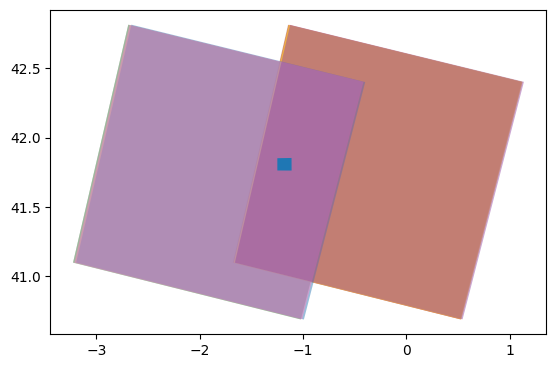

In [69]:
ax = landsat_search.plot('entity_id',
                    alpha = 0.5,
                    cmap = 'Set1',
                    #legend = True
                     )
geom.plot(ax=ax)

In [70]:
for i in landsat_search['entity_id']:
    try:
        DownloadImagery.download_landsat(username = username_landsat,
                                 password = password_landsat,
                                 id = i,
                                 output_dir = f'.././output/{i}')
    except:
        print(f'Not possible to download {i}.')
        pass

Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
Not possible to download LC91990312023140LGN00.
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
Not possible to download LC82000312023123LGN00.
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
Not possible to download LC81990312023116LGN00.
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
Not possible to download LC92000312023115LGN00.
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
Not possible to download LC91990312023108LGN00.
Not possible to download LC82000312023107LGN00.
Not possible to download LC92000312023099LGN00.
Not possible to download LC91990312023092LGN00.


In [36]:
try:
    DownloadImagery.download_landsat(username = username_landsat,
                                 password = password_landsat,
                                 id = 'LC91790272023160LGN00',
                                 output_dir = f'.././output/{i}')
except:
    print(f'Not possible to download {i}.')
    pass

Not possible to download LC81790282023152LGN00.
